# Example of MoveIt usage

This is an example of MoveIt

In [25]:
import sys
import copy

import rospy
import rospy as rp

import moveit_commander
import moveit_msgs.msg
import geometry_msgs.msg
from math import pi
from std_msgs.msg import String
from moveit_commander.conversions import pose_to_list

In [26]:
moveit_commander.roscpp_initialize(sys.argv)
rospy.init_node('move_group_python_interface_tutorial',
                anonymous=True)

In [27]:
robot = moveit_commander.RobotCommander()

In [28]:
scene = moveit_commander.PlanningSceneInterface()

In [29]:
group = moveit_commander.MoveGroupCommander("arm")

RuntimeError: Unable to connect to move_group action server 'move_group' within allotted time (5s)

In [6]:
group

In [30]:
group.get_name()

'arm'

In [8]:
# group.set_end_effector_link('gripper_eef')

In [8]:
group.has_end_effector_link()

True

In [9]:
print robot.get_current_state()

joint_state: 
  header: 
    seq: 0
    stamp: 
      secs: 0
      nsecs:         0
    frame_id: "base_link"
  name: [shoulder_pan_joint, shoulder_lift_joint, elbow_joint, wrist_1_joint, wrist_2_joint,
  wrist_3_joint, finger_joint, left_inner_finger_joint, left_inner_knuckle_joint,
  right_inner_knuckle_joint, right_outer_knuckle_joint, right_inner_finger_joint]
  position: [-1.4696615461640548, 2.3087038579085917, -2.3917289044681547, -0.6751871019965101, -0.7488662131590775, 2.510409359735925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  velocity: []
  effort: []
multi_dof_joint_state: 
  header: 
    seq: 0
    stamp: 
      secs: 0
      nsecs:         0
    frame_id: "base_link"
  joint_names: []
  transforms: []
  twist: []
  wrench: []
attached_collision_objects: []
is_diff: False


In [10]:
group_variable_values = group.get_current_joint_values()

In [11]:
group_variable_values

[-1.4696615461640548,
 2.3087038579085917,
 -2.3917289044681547,
 -0.6751871019965101,
 -0.7488662131590775,
 2.510409359735925]

In [35]:
group.set_joint_value_target(group.get_random_joint_values())
plan2 = group.plan()

In [36]:
group.execute(plan2)

False

In [37]:
group.get_current_pose()

header: 
  seq: 0
  stamp: 
    secs: 1566037374
    nsecs: 658799886
  frame_id: "base_link"
pose: 
  position: 
    x: 0.0
    y: 0.0
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 1.0

In [19]:
pose_target = geometry_msgs.msg.Pose()
pose_target.orientation.w = 1
pose_target.position.x = 0.5
pose_target.position.y = 0.5
pose_target.position.z = 0.5

In [20]:
group.set_start_state_to_current_state()
group.set_pose_target(pose_target)

In [21]:
planx = group.plan()

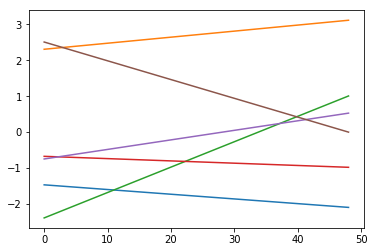

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

plt_list = []
for el in planx.joint_trajectory.points:
    plt_list.append(el.positions)
for i in range(len(plt_list[0])):
    plt.plot(np.asarray(plt_list)[:, i])
    
plt.show()

In [24]:
?group.execute

Signature: group.execute(plan_msg, wait=True)
Docstring: Execute a previously planned path
File:      /opt/ros/kinetic/lib/python2.7/dist-packages/moveit_commander/move_group.py
Type:      instancemethod


In [23]:
group.execute(planx)

True

In [26]:
group.get_random_joint_values()

[2.7057022658742715,
 -0.47450919259539504,
 1.110279686691296,
 2.6444287774503854,
 1.689370072267451,
 0.9262634683514523]

In [27]:
group.compute_cartesian_path([pose_target], 0.1, 0.1)

(joint_trajectory: 
   header: 
     seq: 0
     stamp: 
       secs: 0
       nsecs:         0
     frame_id: "/base_link"
   joint_names: [shoulder_pan_joint, shoulder_lift_joint, elbow_joint, wrist_1_joint, wrist_2_joint,
   wrist_3_joint]
   points: 
     - 
       positions: [-2.0982880490242843, 3.1174390873300917, 1.0076323671860816, -0.9852849876726717, 0.5265906595458618, 0.0012730718317946182]
       velocities: []
       accelerations: []
       effort: []
       time_from_start: 
         secs: 0
         nsecs:         0
 multi_dof_joint_trajectory: 
   header: 
     seq: 0
     stamp: 
       secs: 0
       nsecs:         0
     frame_id: ''
   joint_names: []
   points: [], 0.5)